# Итоговая работа

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy

from scipy.optimize import minimize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
ratings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
def cosine_similarity(user, ratings):
    """ Определяет наиболее похожего пользователя методом косинусного сходства
    
    Параметры
    ---------
    user : array-like
      Вектор данных определенного пользователя
    ratings : {array-like}
      Матрица векторов всех пользователей без искомого
      
    Результат:
      user_id, cosine: tuple
      Номер строки из ratings для максимально похожего пользователя, косинусное расстояние между векторами 
    """
    
    result = []
    
    for rating_user_id, rating_user_vektor in enumerate(ratings):
        cosine = np.dot(rating_user_vektor, user) / (np.linalg.norm(rating_user_vektor) * np.linalg.norm(user))
        result.append((rating_user_id, cosine))
        
    most_similar_user_id, most_similar_user_cosine  = sorted(result, key=lambda x: x[1], reverse=True)[0]
        
    return most_similar_user_id, most_similar_user_cosine

In [4]:
similar_pair = []
for user_id, user_vektor in enumerate(ratings):
    most_similar_user_id, most_similar_user_cosine = cosine_similarity(user=user_vektor, 
                                                                       ratings=np.delete(ratings, user_id, axis=0))
    similar_pair.append((user_id, most_similar_user_id))
print(similar_pair)

[(0, 7), (1, 3), (2, 8), (3, 8), (4, 7), (5, 8), (6, 3), (7, 5), (8, 0), (9, 2)]


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

Можно сжать с помощью алгоритма PCA.

In [5]:
scaler = StandardScaler()
scaler.fit(ratings)
ratings_std = scaler.transform(ratings)

pca = PCA(n_components=5)
pca.fit(ratings_std)
ratings_std_pca = pca.transform(ratings_std)

In [6]:
ratings_std_pca

array([[-2.23314118, -0.102165  ,  0.44797696,  2.61804741,  1.0095813 ],
       [ 0.92243636,  0.81306507, -1.87510954, -0.58041712,  2.4045235 ],
       [-1.67575359, -2.02879876, -1.16066737,  0.50380895, -0.71030389],
       [ 1.67999615, -2.67145216, -0.99414903,  0.34709449,  0.31175136],
       [-0.11513119,  3.07699788, -0.14533016,  0.48754373, -1.00058414],
       [ 0.35464165, -0.64108618,  3.24099221, -1.77678483,  1.25848972],
       [ 3.75882285,  1.04221289, -1.01919801, -0.47560766, -0.70545265],
       [ 2.13598259, -0.57558425,  1.86176566,  1.29283165, -1.3613989 ],
       [-2.1630807 ,  1.79347946,  0.38668074, -0.16732588,  0.20976016],
       [-2.66477294, -0.70666895, -0.74296145, -2.24919074, -1.41636647]])

## Задание 2

Вычислите производную $f(x) = tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

а) На бумаге

$
f(x)'= 2tg(sin(x) + cos(2x+3))*(tg(sin(x) + cos(2x+3)))' = \\
2tg(sin(x) + cos(2x+3)) * \frac{1}{cos^2(sin(x) + cos(2x+3))} * (sin(x) + cos(2x+3))' = \\
2tg(sin(x) + cos(2x+3)) * \frac{1}{cos^2(sin(x) + cos(2x+3))} * (cos(x) - 2sin(2x+3)) =\\
2tg(sin(x) + cos(2x+3)) * (tg^2(sin(x) + cos(2x+3))+1) * (cos(x) - 2sin(2x+3))
$

Для x = 1

$2tg(sin(1) + cos(5)) * (tg^2(sin(1) + cos(5))+1) * (cos(1) - 2sin(5)) = \\
2tg(0,84147 + 0,28366) * (tg^2(0,84147 + 0,28366)+1) * (0,54030 - (-1,91785)) = \\
4,18654 * 5,38178 * 2,45815 = 55,38466$

2) Реализация в python 

In [7]:
x = sympy.symbols('x')
fx = sympy.tan(sympy.sin(x) + sympy.cos(2*x + 3))**2
fx

tan(sin(x) + cos(2*x + 3))**2

In [8]:
print('Первая производная функции:')
sympy.diff(fx, x)

Первая производная функции:


2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [9]:
print('Значение производной в точке x=1:')
sympy.diff(fx, x).evalf(subs={x: 1})

Значение производной в точке x=1:


55.3859176353379

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

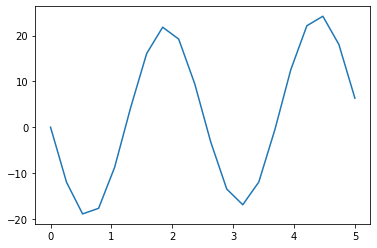

In [10]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

plt.plot(x, fx)
plt.show()

In [11]:
result = minimize(error, [0,0], method='Nelder-Mead', options={'disp': True, 'maxiter': 10000})
print(f'Найден минимум функции ошибок {result.fun} в точке a={result.x[0]}, b={result.x[1]}')

Optimization terminated successfully.
         Current function value: 234.951035
         Iterations: 3404
         Function evaluations: 5947
Найден минимум функции ошибок 234.9510347189497 в точке a=4.863222471245271, b=0.016885718925033908


## Задание 4¶

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

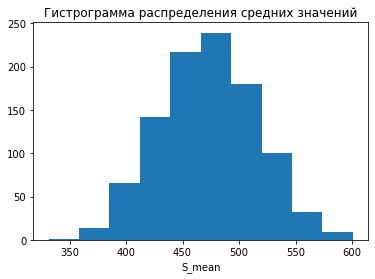

In [12]:
x = np.random.randint(0, 1000, size=20)

means = []
for _ in range(1000):
    x_sample = np.random.choice(x, size=50, replace=True)
    means.append(x_sample.mean())
    
plt.hist(means)
plt.title('Гистрограмма распределения средних значений')
plt.xlabel('S_mean')
plt.show()

## Задание 5¶

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [13]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


1) Письменное решение

$
\begin{vmatrix} 
    1-\lambda & 4 \\
    1 & 1-\lambda
\end{vmatrix} = 0
$

$ det = (1-\lambda)*(1-\lambda) - 4 = 0 \\ 
\lambda^2 - 2\lambda - 3 = 0 \\
D = 4^2 + 12 = 16 \\
\lambda_1 = \frac{2+4}{2} = 3 \\
\lambda_2 = \frac{2-4}{2} = -1 \\
$

Найдем вектор для $\lambda_1$. Для этого решим систему уравнений:

$ -2x +4y = 0 \\ x -2y = 0$

Из системы уравнений вытекает следующее: $x = 2y$  
Тогда собственный вектор для $\lambda_1$: [2, 1]

Найдем вектор для $\lambda_2$. Для этого решим систему уравнений:

$ 2x +4y = 0 \\ x + 2y = 0$

Из системы уравнений вытекает следующее: $x = -2y$  
Тогда собственный вектор для $\lambda_2$: [2, -1]

2) Решение в python

In [14]:
np.linalg.eig(m)

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))